In [11]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from skimage.filters import sobel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage.feature import canny
from skimage.io import imread, imshow
from skimage import io, color, util
from skimage.filters import prewitt_h,prewitt_v
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
import skfuzzy as fuzz

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [12]:
# Define the categories
Categories = ['Diseased', 'Healthy']

flat_data_arr = []  # Input array
target_arr = []  # Output array
datadir = 'C:\\Users\\vivek\\project\\root\\Augmentation\\dataset' 

# Load images and perform image segmentation using Fuzzy C-Means clustering
for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = io.imread(img_path)
        
        # Convert the image to grayscale
        img_gray = color.rgb2gray(img_array)
        
        # Resize the image to a desired size (e.g., 64x64)
        img_resized = resize(img_gray, (64, 64))
        
        # Flatten the image
        img_flattened = img_resized.flatten()
        
        flat_data_arr.append(img_flattened)
        target_arr.append(Categories.index(category))
    
    print(f'Loaded category: {category} successfully')

# Convert the data to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Apply Fuzzy C-Means clustering
n_clusters = len(Categories)  # Number of clusters
fuzziness = 2.0  # Fuzziness parameter (typically 2.0)
max_iter = 100  # Maximum number of iterations

# Scale the data
scaler = MinMaxScaler()
flat_data_scaled = scaler.fit_transform(flat_data)

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(flat_data_scaled.T, n_clusters, fuzziness,
                                                 maxiter=max_iter, error=0.005)


# The u matrix contains the membership values for each pixel and each cluster
# Convert u matrix to cluster labels
cluster_labels = np.argmax(u, axis=0)

# Create a DataFrame for the clustered data
df = pd.DataFrame(flat_data)
df['Target'] = target
df['Cluster'] = cluster_labels

# Split the data into training and testing sets
x = df.iloc[:, :-2]  # Input data
y = df['Cluster']  # Cluster labels as output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=77, stratify=y)

print("x:", x.shape)
print("y:", y.shape)
print('Splitted Successfully')



loading... category : Diseased
C:\Users\vivek\project\root\Augmentation\dataset\Diseased
loaded category:Diseased successfully
loading... category : Healthy
C:\Users\vivek\project\root\Augmentation\dataset\Healthy
loaded category:Healthy successfully
x: (7000, 4096)
y: (7000,)
Splitted Successfully


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       753
           1       0.87      0.94      0.90       647

    accuracy                           0.90      1400
   macro avg       0.90      0.91      0.90      1400
weighted avg       0.91      0.90      0.90      1400

Accuracy: 90.36 %
Precision: 90.64 %
Recall: 90.36 %
f1_score: 89.98 %
TrainingAccuracy: 96.52 %


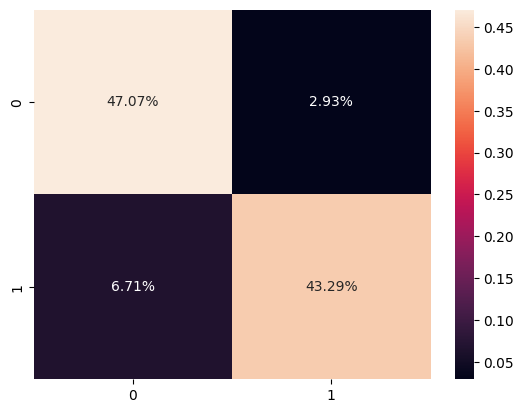

In [13]:
#RandomForestClassifier
print("RandomForestClassifier")

from sklearn.ensemble import RandomForestClassifier
#model_rf=RandomForestClassifier()
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
min_samples_split=12, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='log2',
max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,   random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
y_pred_rf
acc_rf=accuracy_score(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_rf = accuracy_score(y_pred_rf,y_test) 
p_rf = precision_score(y_pred_rf,y_test, average = 'weighted')
r_rf = recall_score(y_pred_rf,y_test, average = 'weighted')
print("Accuracy:",round(a_rf*100,2),"%")
print("Precision:",round(p_rf*100,2),"%")
print("Recall:",round(r_rf*100,2),"%")
f1_rf = f1_score(y_test, y_pred_rf)
print("f1_score:",round(f1_rf*100,2),"%")
Training_accuracy_rf=accuracy_score(y_train, model_rf.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_rf*100,2),"%")


